Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv("C:/Users/Asus/Documents/Projects/Python/diabetess.csv")

In [3]:
pd.read_csv?

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
standardized_data = scaler.transform(X)

In [15]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [16]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [17]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [20]:
classifier = svm.SVC(kernel='linear')

In [21]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [22]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print('Accuracy score of the training data svm : ', training_data_accuracy)

Accuracy score of the training data svm :  0.7866449511400652


In [24]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print('Accuracy score of the test data svm: ', test_data_accuracy)

Accuracy score of the test data svm:  0.7727272727272727


Making a Predictive System

In [70]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


# LR

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
#training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
#accuracy score on training data
X_train_prediction_lr = model.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)

In [31]:
print('Accuracy score on Training data: ', training_data_accuracy_lr*100)

Accuracy score on Training data:  78.50162866449512


In [32]:
#accuracy score on test data

X_test_prediction_lr = model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)


In [33]:
print('Accuracy score on Test data: ', test_data_accuracy_lr*100)

Accuracy score on Test data:  75.97402597402598


In [34]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [38]:
#accuracy score on training data
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)

In [39]:
print('Accuracy score on Training data by knn: ', training_data_accuracy_knn*100)

Accuracy score on Training data by knn:  82.89902280130293


In [40]:
#accuracy score on test data

X_test_prediction_knn = knn.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)

In [41]:
print('Accuracy score on Test data by knn: ', test_data_accuracy_knn*100)

Accuracy score on Test data by knn:  72.07792207792207


In [42]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[0]
The person is not diabetic


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# RANDOM FOREST

In [43]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier()

In [45]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [46]:
#accuracy score on training data
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)

In [47]:
print('Accuracy score on Training data by rf: ', training_data_accuracy_rf*100)

Accuracy score on Training data by rf:  100.0


In [48]:
#accuracy score on test data

X_test_prediction_rf = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)

In [49]:
print('Accuracy score on Test data by rf: ', test_data_accuracy_rf*100)

Accuracy score on Test data by rf:  73.37662337662337


# DECISION TREE

In [50]:
from sklearn.tree import DecisionTreeClassifier 

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [53]:
#accuracy score on training data
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

In [54]:
print('Accuracy score on Training data by dt: ', training_data_accuracy_dt*100)

Accuracy score on Training data by dt:  100.0


In [55]:
#accuracy score on test data

X_test_prediction_dt = dt.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

In [56]:
print('Accuracy score on Test data by dt: ', test_data_accuracy_dt*100)

Accuracy score on Test data by dt:  69.48051948051948


# COMPARISON B/W MODELS

In [57]:
final_data = pd.DataFrame({'Models':['SVM','LR','KNN','RF','DT'],
                           'ACC':[accuracy_score(Y_test,X_test_prediction)*100,
                                 accuracy_score(Y_test,X_test_prediction_lr)*100,
                                 accuracy_score(Y_test,X_test_prediction_knn)*100,
                                 accuracy_score(Y_test,X_test_prediction_dt)*100,
                                 accuracy_score(Y_test,X_test_prediction_rf)*100]})

In [58]:
final_data

,Models,ACC
0,SVM,77.272727
1,LR,75.974026
2,KNN,72.077922
3,RF,69.480519
4,DT,73.376623


In [59]:
import matplotlib.pyplot as plt

In [60]:
import seaborn as sns

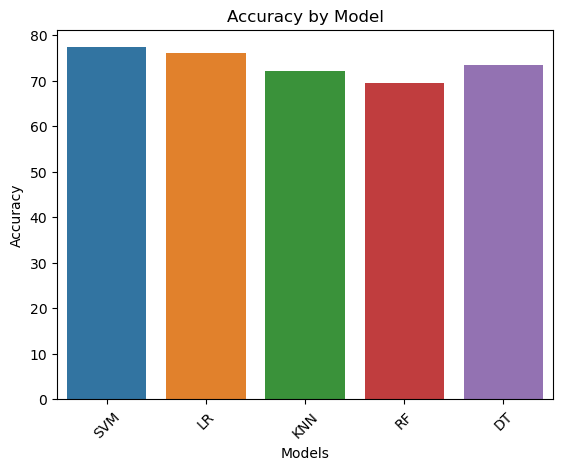

In [61]:
sns.barplot(x='Models', y='ACC', data=final_data)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

In [62]:
from sklearn import metrics

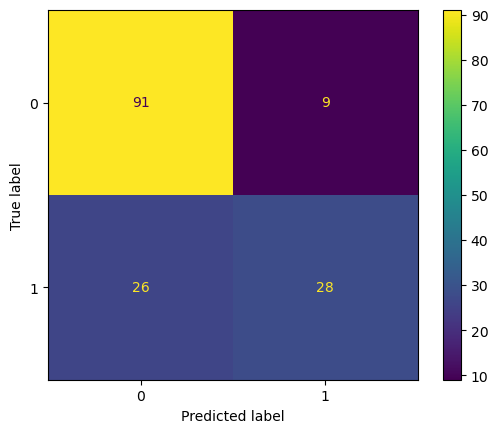

In [63]:
confusion_matrix = metrics.confusion_matrix(Y_test, X_test_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# saving model

In [64]:
import pickle

In [72]:
filename = "diabetes_model.sav"
pickle.dump(classifier, open(filename,'wb'))

In [73]:
loaded_model = pickle.load(open('diabetes_model.sav','rb'))

In [74]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
